In [1]:
%pylab inline
import twx

Populating the interactive namespace from numpy and matplotlib


# Question 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def generate_serie(y0, length = 252*10, vol=0.2, g=0.22, gamma=1.15, tau=1/252, T=500):
    ys = [y0]
    vols = [vol]
    sigma = vol
    y = y0
    factor = g/(vol**2*tau)
    for _ in range(length):
        omega = np.random.normal(0,1)
        y = y + sigma*omega*np.sqrt(tau)
        ys.append(y)
        t = len(ys)
        sigma = 0
        for l in range(1, min(t,T)+1, 1):
            sigma += factor/l**gamma*(y-ys[t-l])**2/l
        sigma += 1
        sigma = np.sqrt(sigma)*vol
        vols.append(sigma)
        
    return ys, vols

In [15]:
y0 = np.log(10)
np.random.seed(123)
logprices, vols = generate_serie(y0)

In [16]:
df = pd.DataFrame(logprices)
df.columns = ['Log Prices']
df['Prices'] = np.exp(df['Log Prices'])
df['MultiScale Vols'] = vols

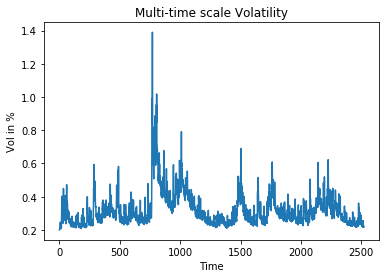

In [17]:
plt.xlabel('Time')
plt,ylabel('Vol in %')
plt.title('Multi-time scale Volatility')
df['MultiScale Vols'].plot()

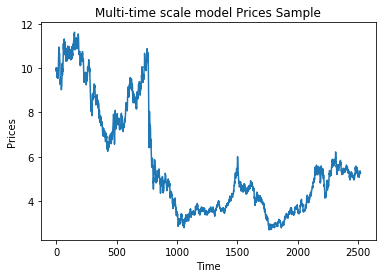

In [18]:
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Multi-time scale model Prices Sample')
df['Prices'].plot()

In [19]:
df['Returns'] = df['Prices']/df['Prices'].shift(1)

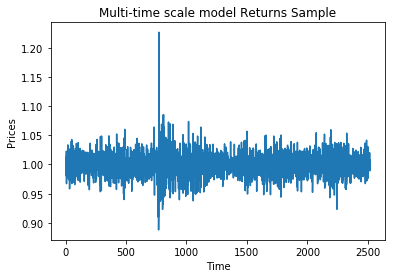

In [20]:
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Multi-time scale model Returns Sample')
df['Returns'].plot()

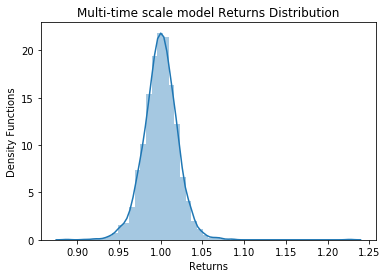

In [22]:
plt.xlabel('Time')
plt.ylabel('Density Functions')
plt.title('Multi-time scale model Returns Distribution')
sns.distplot(df['Returns'])

# Question 2